In [12]:
import json
import gzip
import math
import numpy as np
import random
import statistics
import pandas as pd
from matplotlib import pyplot as plt
import seaborn
import datetime
from tqdm import tqdm

In [7]:
event_df = pd.read_csv('train_logs.csv.zip')
event_df

,id,event_id,down_time,up_time,action_time,activity,down_event,up_event,text_change,cursor_position,word_count
0,001519c8,1,4526,4557,31,Nonproduction,Leftclick,Leftclick,NoChange,0,0
1,001519c8,2,4558,4962,404,Nonproduction,Leftclick,Leftclick,NoChange,0,0
2,001519c8,3,106571,106571,0,Nonproduction,Shift,Shift,NoChange,0,0
3,001519c8,4,106686,106777,91,Input,q,q,q,1,1
4,001519c8,5,107196,107323,127,Input,q,q,q,2,1
...,...,...,...,...,...,...,...,...,...,...,...
8405893,fff05981,3615,2063944,2064440,496,Nonproduction,Leftclick,Leftclick,NoChange,1031,240
8405894,fff05981,3616,2064497,2064497,0,Nonproduction,Shift,Shift,NoChange,1031,240
8405895,fff05981,3617,2064657,2064765,108,Replace,q,q,q => q,1031,240
8405896,fff05981,3618,2069186,2069259,73,Nonproduction,Leftclick,Leftclick,NoChange,1028,240


In [11]:
score_df = pd.read_csv('train_scores.csv')
score_df = score_df.set_index('id')
score_df

,score
id,
001519c8,3.5
0022f953,3.5
0042269b,6.0
0059420b,2.0
0075873a,4.0
...,...
ffb8c745,3.5
ffbef7e5,4.0
ffccd6fd,1.5


# Exploratory Data Analysis

I chose this data due to my personal interest in the use of typing patterns as indicators of certain behaviors, and this was a great way to understand the structure / nature of most typing data sets & train models on them. 

## First, let's look at the distribution of scores

We are trying to predict essay scores, so let's examine scores of essays

array([[<Axes: title={'center': 'score'}>]], dtype=object)

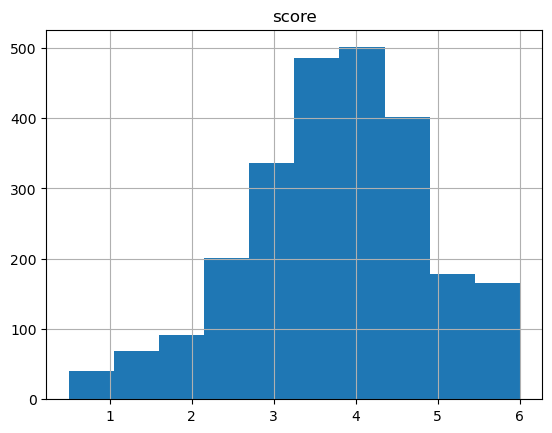

In [13]:
score_df.hist(column='score')

## Let's also take a look at the # of events we have per id & see if there is a lot of variance with that

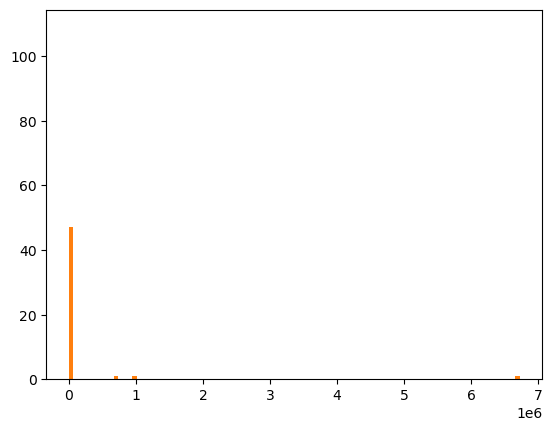

In [22]:
plt.hist(event_df.groupby('id').size(), 100);

<Axes: xlabel='activity'>

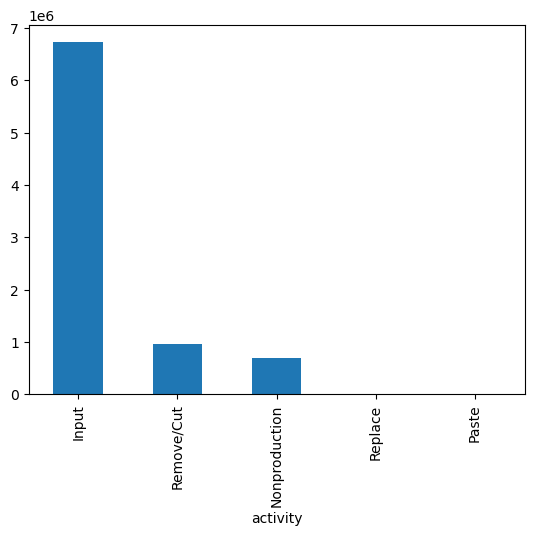

In [29]:
event_df['activity'].value_counts()[:5].plot.bar()

From this result, it looks like the primary features we will be examining are input, remove/cut and nonproductions and how those are spaced out with regards to timestamps, etc.

# Prediction

## Naive Approach (Linear Regression)

The dataset has keystrokes from users, but the keys are anonymized as 'q' so the goal is to use the timestamps / ordering of events to train some model to predict the score of each essay. There are about 2500 users' essays in the dataset and nearly 8.5 million events, so I'll definitely have to drastically reduce dimensionality when I do regular classification. For now, though, we can see if we can fit a regression between # of events and the score for each essay.

In [30]:
def MSE(predictions, actual):
    return sum((predictions[i] - actual[i])**2 for i in range(len(predictions))) / len(predictions)

In [ ]:
## Train Test Split:
seed = 2004


